import important modules/packages

In [3]:
import os
import time
import datetime
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

Download online csv file

In [7]:
PROJECT_DIR = "H:\\CS4410(Machine Learning)\\Samle ML Code"
DATA_DIR = "Datasets"
mypath = os.path.join(PROJECT_DIR,DATA_DIR)

from six.moves import urllib

CSV_PATH=os.path.join(mypath,"airline.csv")
DATA_URL = "https://github.com/fivethirtyeight/data/blob/master/airline-safety/airline-safety.csv"
def fetch_data(data_url=DATA_URL, pathtosave=mypath,csv_path=CSV_PATH):
    if not os.path.isdir(pathtosave):
        os.makedirs(pathtosave)
    urllib.request.urlretrieve(data_url, csv_path)
    
fetch_data()

Load some data, sklearn comes with several datasets

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()

In [7]:
type(boston)

sklearn.utils.Bunch

In [9]:
from sklearn.utils import Bunch

In [10]:
Bunch?


read keys

In [11]:
for bos in boston:
    print (bos)

data
target
feature_names
DESCR
filename


In [13]:
boston.feature_names
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

Load in pandas

In [14]:
bospd = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])

In [15]:
bospd['MEDV'] = boston['target']

see correlation

In [16]:
bospd.corr()


CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

A better visualization



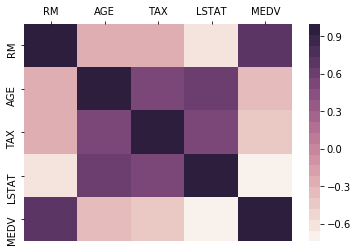

In [17]:
%matplotlib inline 
#ask jupyter to render
cols=['RM','AGE', 'TAX','LSTAT','MEDV']
ax = sb.heatmap(bospd[cols].corr(), cmap=sb.cubehelix_palette(20, light =0.95,dark = 0.15))
ax.xaxis.tick_top()#labels to the top


you can get pairplot

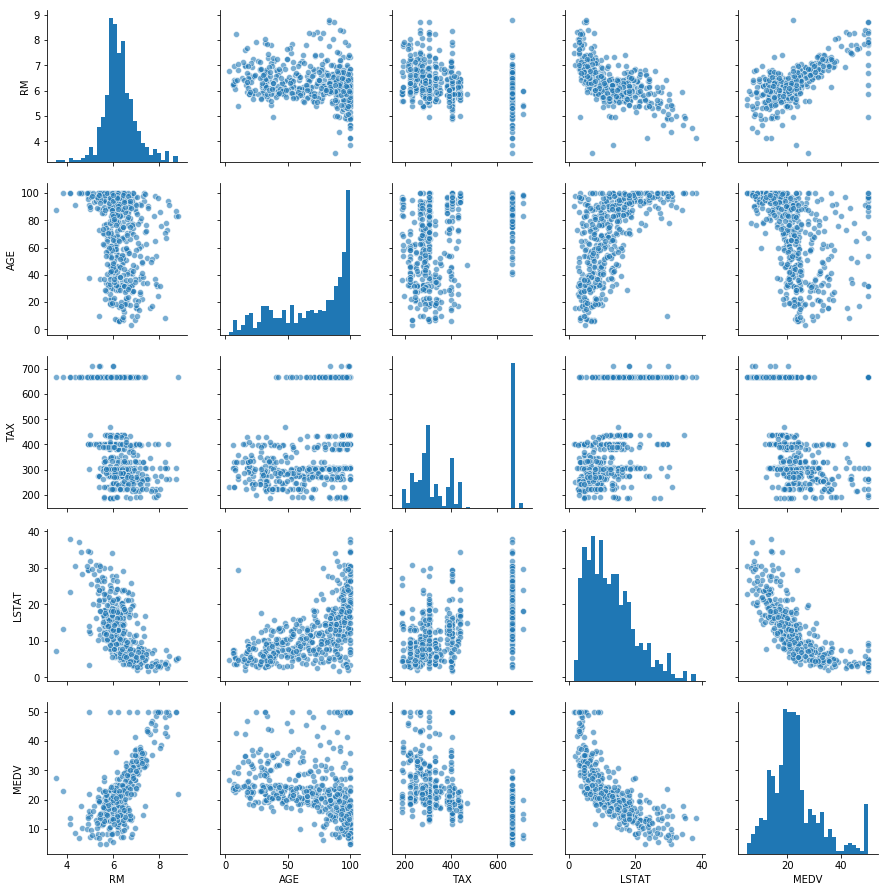

In [18]:
sb.pairplot(bospd[cols], plot_kws={'alpha': 0.6}, diag_kws={'bins':30})

In [19]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(bospd, 0.2)
print(len(train_set), "train +", len(test_set), "test")

405 train + 101 test


sklearn has a function that can do the split, there is a function to perform the stratified shuffle split, check it out

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bospd, test_size=0.2, random_state=42)

In [25]:
print(len(train_set), "train +", len(test_set), "test")

404 train + 102 test


get ready for machine learning

In [26]:
bostonT = train_set.drop("MEDV", axis=1) # drop labels for training set
Boston_labels = train_set["MEDV"].copy()

In [27]:
len(bostonT)

404

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(bostonT,Boston_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
selectdata = bostonT.iloc[:5]
selectlabels = Boston_labels.iloc[:5]
print("Predictions:", lin_reg.predict(selectdata))
print("Labels:", list(selectlabels))

Predictions: [10.96952405 19.41196567 23.06419602 12.1470648  18.3738116 ]
Labels: [12.0, 19.9, 19.4, 13.4, 18.2]


In [30]:
lin_reg.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [31]:
lin_reg.intercept_

30.246750993923712